#BLOG POST 1: Data Retrieval and Cleaning

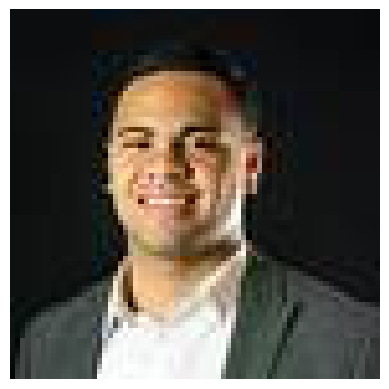

In [3]:
## IMAGE TEST
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "YOUR_IMAGE_URL_HERE"
response = requests.get("https://avatars.slack-edge.com/2022-08-02/3887372396916_c37e1c61f0bd65b13aae_72.jpg")

# Check if the request was successful
if response.status_code == 200:
    # Open the image
    image = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
else:
    print(f"Failed to retrieve image. Status code: {response.status_code}")

In [1]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\bwegr\Desktop\MBA\Courses\STAT 386 - Data Science Process\Final Project\stat386project


In [3]:
# IMPORT DATA

# Import JSON and Create Tables
## Tables
    ### Users
    ### Channels

## Master file with all channels


import os

def get_folders_in_dir(dir):
    folders = []
    for item in os.listdir(dir):
        # Create full path
        full_path = os.path.join(dir, item)
        # Check if it's a directory
        if os.path.isdir(full_path):
            folders.append(full_path)
    return folders

# Example usage
folders = get_folders_in_dir('slack_data/')
print(folders)

['slack_data/2023-internships-rescue-brigade', 'slack_data/2024-cruise', 'slack_data/2024marketers', 'slack_data/2024_southamerica', 'slack_data/2025marketers', 'slack_data/acquisition-info-session-and-competition', 'slack_data/adam-smith-society', 'slack_data/advancedbrandfall23', 'slack_data/anime', 'slack_data/asia_2023_reunion', 'slack_data/b2b_fall_2023', 'slack_data/billion-dollar-contract', 'slack_data/blue_lounge', 'slack_data/byu_game_squad', 'slack_data/case_competitions', 'slack_data/chat', 'slack_data/christine', 'slack_data/christmas-choir-2023', 'slack_data/class-bidding-black-market', 'slack_data/club-blue-forge', 'slack_data/club_analytics', 'slack_data/club_gea', 'slack_data/club_gfa', 'slack_data/club_hla', 'slack_data/club_mbama', 'slack_data/club_mbats', 'slack_data/club_pma', 'slack_data/corporatefinancialreporting-mba501', 'slack_data/course-catalog', 'slack_data/fantasyfootball', 'slack_data/FC_F063PH5B2MA_Type something', 'slack_data/fine_arts', 'slack_data/hay-

In [21]:
import json
import pandas as pd

def read_json_files(folders):
    all_data = pd.DataFrame()

    for folder in folders:
        for file in os.listdir(folder):
            if file.endswith('.json'):
                file_path = os.path.join(folder, file)
                with open(file_path, 'r') as json_file:
                    data = pd.DataFrame(json.load(json_file))
                    data.insert(0, 'channel', file)
                    all_data.append(data, ignore_index=True)
    return all_data

# Example usage
#folder_paths = ['/path/to/folder1', '/path/to/folder2']
all = read_json_files(folders)
#data = pd.DataFrame(all)
#data
all

C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Tem

""


In [22]:
print(all)

Empty DataFrame
Columns: []
Index: []


In [23]:
def read_json_files(folders):
    all_data = pd.DataFrame()

    for folder in folders:
        if not os.path.exists(folder):
            print(f"Folder not found: {folder}")
            continue

        for file in os.listdir(folder):
            if file.endswith('.json'):
                file_path = os.path.join(folder, file)

                try:
                    with open(file_path, 'r') as json_file:
                        data = pd.read_json(json_file)
                        data.insert(0, 'channel', file)
                        all_data = all_data.append(data, ignore_index=True)
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

    return all_data

# Example usage
#folder_paths = ['/path/to/folder1', '/path/to/folder2']
data = read_json_files(folders)
print(data)

C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ign

              channel                         client_msg_id     type  \
0     2023-10-18.json  A3596BA8-FC44-4B86-8236-C9152409AE8F  message   
1     2023-10-18.json  C141977D-A33B-4169-BC8C-22A78F89D3D3  message   
2     2023-10-18.json  5C0F4402-3BF3-42AE-A23F-99A34774D4C5  message   
3     2023-10-18.json  FF5FB03E-48AD-427A-82AB-43DCFFD8E4C5  message   
4     2023-10-19.json  9BE97A04-A58D-45F8-97DB-D377984AE836  message   
...               ...                                   ...      ...   
2743  2023-10-13.json  2480C1C8-1CE2-4455-B3DB-E72B07A78AB0  message   
2744  2023-10-13.json  002216f5-e7a3-44af-933d-535d5b470c71  message   
2745  2023-10-13.json  EFCEABA8-CC03-456E-9353-DDCEAA0D020A  message   
2746  2023-10-14.json  5f70e832-058a-425a-aac8-02124266f89c  message   
2747  2023-10-14.json  00A5F014-AE1D-4C0A-A6AA-194F7A2008D0  message   

                                                   text         user  \
0     Hola muchachones , los créditos de cada semest...  U03M8T

C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\1088884498.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)


In [24]:
data

,channel,client_msg_id,type,text,user,ts,blocks,team,user_team,source_team,...,date_delete,url_private_download,shares,inviter,last_read,x_files,root,username,app_id,hidden
0,2023-10-18.json,A3596BA8-FC44-4B86-8236-C9152409AE8F,message,"Hola muchachones , los créditos de cada semest...",U03M8T51VUY,1.697639e+09,"[{'type': 'rich_text', 'block_id': 'kdJP8', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-18.json,C141977D-A33B-4169-BC8C-22A78F89D3D3,message,Es lo que Christine me dijo. Podés preguntarle...,U03LK4ZPZ4J,1.697639e+09,"[{'type': 'rich_text', 'block_id': '8jBTM', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-18.json,5C0F4402-3BF3-42AE-A23F-99A34774D4C5,message,Buenísimo,U03M8T51VUY,1.697640e+09,"[{'type': 'rich_text', 'block_id': 'dh4dY', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-18.json,FF5FB03E-48AD-427A-82AB-43DCFFD8E4C5,message,Gracias,U03M8T51VUY,1.697640e+09,"[{'type': 'rich_text', 'block_id': '8VnI7', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-19.json,9BE97A04-A58D-45F8-97DB-D377984AE836,message,"Listo, ya confirme con Christine mis créditos ...",U03M8T51VUY,1.697728e+09,"[{'type': 'rich_text', 'block_id': 'X0wyY', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,2023-10-13.json,2480C1C8-1CE2-4455-B3DB-E72B07A78AB0,message,Thanks for the update!,U03LK4YF3A6,1.697244e+09,"[{'type': 'rich_text', 'block_id': 'VSUE8', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2744,2023-10-13.json,002216f5-e7a3-44af-933d-535d5b470c71,message,A primer on everyone's favorite oyster idiom...,U03LK39PKRR,1.697254e+09,"[{'type': 'rich_text', 'block_id': 'LIV48', 'e...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2745,2023-10-13.json,EFCEABA8-CC03-456E-9353-DDCEAA0D020A,message,Wow. Phenomenal,U03LK4YBK7C,1.697259e+09,"[{'type': 'rich_text', 'block_id': 'oqmt0', 'e...",T0ZBAEL59,T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,2023-10-14.json,5f70e832-058a-425a-aac8-02124266f89c,message,I'm over here reacting to posts with lame yell...,U03LK39PKRR,1.697299e+09,"[{'type': 'rich_text', 'block_id': 'SNgyE', 'e...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.describe()

,ts,thread_ts,reply_count,reply_users_count,latest_reply,is_locked,subscribed,upload,display_as_bot,created,size,date_delete,last_read,hidden
count,2.728000e+03,1.824000e+03,396.000000,396.000000,3.960000e+02,396.0,396.000000,256.0,231.0,2.000000e+01,20.000000,20.0,1.800000e+01,1.0
mean,1.697514e+09,1.697501e+09,3.573232,2.755051,1.697597e+09,0.0,0.045455,0.0,0.0,1.695944e+09,12.150000,0.0,1.697537e+09,1.0
std,7.483131e+05,8.236122e+05,3.691549,2.601480,7.647756e+05,0.0,0.208562,0.0,0.0,2.055917e+06,10.327658,0.0,7.548636e+05,NaN
min,1.696248e+09,1.690861e+09,1.000000,1.000000,1.696267e+09,0.0,0.000000,0.0,0.0,1.691348e+09,0.000000,0.0,1.696301e+09,1.0
25%,1.696917e+09,1.696958e+09,1.000000,1.000000,1.696981e+09,0.0,0.000000,0.0,0.0,1.694434e+09,0.000000,0.0,1.697001e+09,1.0
50%,1.697512e+09,1.697553e+09,2.000000,2.000000,1.697650e+09,0.0,0.000000,0.0,0.0,1.695764e+09,14.000000,0.0,1.697526e+09,1.0
75%,1.698162e+09,1.698117e+09,5.000000,3.000000,1.698200e+09,0.0,0.000000,0.0,0.0,1.697767e+09,14.750000,0.0,1.698110e+09,1.0
max,1.698815e+09,1.698813e+09,29.000000,19.000000,1.698873e+09,0.0,1.000000,0.0,0.0,1.698813e+09,31.000000,0.0,1.698690e+09,1.0


In [7]:
csv_file_path = 'all.csv'
data.to_csv(csv_file_path, index=False)

Visualization Ideas

Network graph with pictures that show connection across all channels
Channel Membership network graph